In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('tcas.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (23,24,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(10)

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,MajorName,EntryTypeID,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
5,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
6,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
7,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
8,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
9,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student


In [4]:
df = df.drop(columns=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32','Q33','Q34','Q35','Q36','Q37','Q38','Q39','Q40','Q41','Q42','GPA_Eng','GPA_Math','GPA_Sci','GPA_Sco','EntryGPA'],axis=1)

In [5]:
df.head()

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,MajorName,EntryTypeID,...,SchoolName,SchoolProvince,ProvinceNameEng,SchoolRegion,SchoolRegionName,SchoolRegionNameEng,NationName,ReligionName,GPAX,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,XI SHUANG BANNAN ZHOU MIN ZHONG,CHINA,CHINA,X,ต่างประเทศ,Foreign,จีน,NaN,0.0,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,INCHEON NATIONAL MARITIME HIGH SCHOOL,INCHEON,INCHEON,X,ต่างประเทศ,Foreign,SOUTH KOREA,NaN,0.0,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,KUNMING NO.30 HIGH SCHOOL,YUNNAN,CHINA,X,ต่างประเทศ,Foreign,จีน,NaN,0.0,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,FENGSHUN NO.1 MIDDLE SCHOOL,GUANGDONG,GUANGDONG,X,ต่างประเทศ,Foreign,จีน,NaN,0.0,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,IBARAKI PREFECTURAL MITO DAINI SENIOUR HIGH SC...,JAPAN,JAPAN,X,ต่างประเทศ,Foreign,JAPANESE,NaN,0.0,MFU student


In [6]:
df = df.drop(columns=['MajorName','ApplicationDate','SchoolRegion','ReligionName'],axis=1)

In [7]:
df.head()

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,EntryTypeID,EntryTypeName,...,StudentType,Country,SchoolName,SchoolProvince,ProvinceNameEng,SchoolRegionName,SchoolRegionNameEng,NationName,GPAX,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,...,FOREIGN,China,XI SHUANG BANNAN ZHOU MIN ZHONG,CHINA,CHINA,ต่างประเทศ,Foreign,จีน,0.0,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,...,FOREIGN,Korea,INCHEON NATIONAL MARITIME HIGH SCHOOL,INCHEON,INCHEON,ต่างประเทศ,Foreign,SOUTH KOREA,0.0,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,...,FOREIGN,China,KUNMING NO.30 HIGH SCHOOL,YUNNAN,CHINA,ต่างประเทศ,Foreign,จีน,0.0,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,...,FOREIGN,China,FENGSHUN NO.1 MIDDLE SCHOOL,GUANGDONG,GUANGDONG,ต่างประเทศ,Foreign,จีน,0.0,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,...,FOREIGN,NaN,IBARAKI PREFECTURAL MITO DAINI SENIOUR HIGH SC...,JAPAN,JAPAN,ต่างประเทศ,Foreign,JAPANESE,0.0,MFU student


In [8]:
df = df.drop(columns=['FacultyID','DepartmentCode','DepartmentName','EntryTypeName','EntryGroupID','GPAX'],axis=1)

In [9]:
df = df.drop(columns=['LevelName','SchoolName','ProvinceNameEng','SchoolRegionName','SchoolRegionNameEng','NationName'],axis=1)

In [10]:
df[['EntryGroupName']]= df.EntryGroupName.fillna(df.EntryGroupName.mode()[0])

In [11]:
df[['SchoolProvince']]= df.SchoolProvince.fillna(df.SchoolProvince.mode()[0])

In [12]:
df[['Country']]= df.Country.fillna(df.Country.mode()[0])

In [13]:
df.head()

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyName,EntryTypeID,EntryGroupName,TCAS,LevelID,LevelNameEng,HomeRegion,StudentTH,StudentType,Country,SchoolProvince,Status
0,2562,1,MISS,Female,School of Liberal Arts,40,ปริญญาตรี นักศึกษาต่างชาติ,5,3,Undergraduate,International,0,FOREIGN,China,CHINA,MFU student
1,2562,1,MR.,Male,School of Liberal Arts,40,ปริญญาตรี นักศึกษาต่างชาติ,5,3,Undergraduate,International,0,FOREIGN,Korea,INCHEON,MFU student
2,2562,1,MR.,Male,School of Liberal Arts,40,ปริญญาตรี นักศึกษาต่างชาติ,5,3,Undergraduate,International,0,FOREIGN,China,YUNNAN,MFU student
3,2562,1,MISS,Female,School of Liberal Arts,40,ปริญญาตรี นักศึกษาต่างชาติ,5,3,Undergraduate,International,0,FOREIGN,China,GUANGDONG,MFU student
4,2562,1,MISS,Female,School of Liberal Arts,40,ปริญญาตรี นักศึกษาต่างชาติ,5,3,Undergraduate,International,0,FOREIGN,Thailand,JAPAN,MFU student


In [14]:
df.shape

(36401, 16)

In [15]:
df.dtypes

AcademicYear         int64
AcademicSemester     int64
PrefixName          object
Sex                 object
FacultyName         object
EntryTypeID          int64
EntryGroupName      object
TCAS                 int64
LevelID              int64
LevelNameEng        object
HomeRegion          object
StudentTH            int64
StudentType         object
Country             object
SchoolProvince      object
Status              object
dtype: object

In [16]:
df.isnull().sum()

AcademicYear            0
AcademicSemester        0
PrefixName              0
Sex                     0
FacultyName             0
EntryTypeID             0
EntryGroupName          0
TCAS                    0
LevelID                 0
LevelNameEng            0
HomeRegion          15088
StudentTH               0
StudentType             0
Country                 0
SchoolProvince          0
Status                  0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 3605 missing from current

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 3597 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 3605 missing from current font.
  f

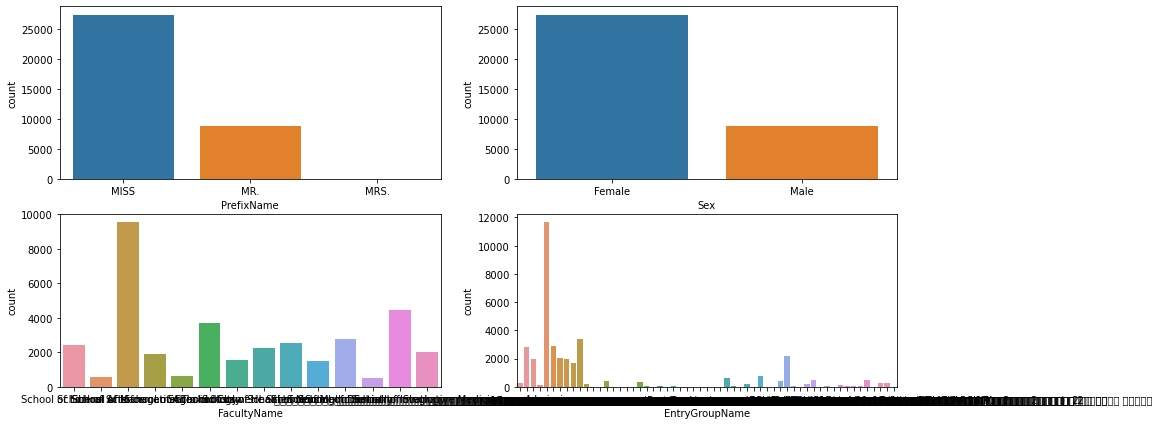

In [17]:
# Separate categorial features
cat_data = df.select_dtypes(include=['object']) 

# Create count plots for all nominal features
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
for i, subplot in zip(cat_data.columns, ax.flatten()):
    sns.countplot(cat_data[i], ax=subplot)

# Feature Engineering


In [18]:
# get all numberic features
num_data = df.select_dtypes(include=['number']) 
# get all nominal / ordinal / Boolean features
cat_data = df[['HomeRegion']]
# get class
class_target = df.EntryGroupName

In [19]:
num_data.head()

,AcademicYear,AcademicSemester,EntryTypeID,TCAS,LevelID,StudentTH
0,2562,1,40,5,3,0
1,2562,1,40,5,3,0
2,2562,1,40,5,3,0
3,2562,1,40,5,3,0
4,2562,1,40,5,3,0


In [20]:
cat_data.head()

,HomeRegion
0,International
1,International
2,International
3,International
4,International


In [21]:
class_target.head()

0    ปริญญาตรี นักศึกษาต่างชาติ
1    ปริญญาตรี นักศึกษาต่างชาติ
2    ปริญญาตรี นักศึกษาต่างชาติ
3    ปริญญาตรี นักศึกษาต่างชาติ
4    ปริญญาตรี นักศึกษาต่างชาติ
Name: EntryGroupName, dtype: object

In [22]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data

,HomeRegion_Bankok,HomeRegion_Central,HomeRegion_East,HomeRegion_International,HomeRegion_North,HomeRegion_North East,HomeRegion_South,HomeRegion_West
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
36396,0,0,0,0,0,0,1,0
36397,0,0,0,0,1,0,0,0
36398,0,0,1,0,0,0,0,0
36399,0,0,0,0,1,0,0,0


In [23]:
#Combine all transformed features together
transform_num_data = pd.concat([cat_data, num_data], axis=1)
transform_num_data.head()

,HomeRegion_Bankok,HomeRegion_Central,HomeRegion_East,HomeRegion_International,HomeRegion_North,HomeRegion_North East,HomeRegion_South,HomeRegion_West,AcademicYear,AcademicSemester,EntryTypeID,TCAS,LevelID,StudentTH
0,0,0,0,1,0,0,0,0,2562,1,40,5,3,0
1,0,0,0,1,0,0,0,0,2562,1,40,5,3,0
2,0,0,0,1,0,0,0,0,2562,1,40,5,3,0
3,0,0,0,1,0,0,0,0,2562,1,40,5,3,0
4,0,0,0,1,0,0,0,0,2562,1,40,5,3,0


In [24]:
df.isnull().sum()

AcademicYear            0
AcademicSemester        0
PrefixName              0
Sex                     0
FacultyName             0
EntryTypeID             0
EntryGroupName          0
TCAS                    0
LevelID                 0
LevelNameEng            0
HomeRegion          15088
StudentTH               0
StudentType             0
Country                 0
SchoolProvince          0
Status                  0
dtype: int64

# Definding

In [25]:
X = transform_num_data
Y = class_target

# Normalixation

In [26]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X)
X = mms.fit_transform(X)

## Building and Evaluating K-Nearest Neighbors (KNN) Models

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)

Training Accuracy:  0.8809648086591028


## Splitting

In [28]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split
# Split training set and test set with ration 70% : 30% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y, random_state = 0)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (25480, 14)
y_train shape:  (25480,)
x_test shape:  (10921, 14)
y_test shape:  (10921,)


In [29]:
Y.value_counts()

รับตรงร่วมกัน                                                                                         11667
โครงการโควตาพิเศษสำหรับครูแนะแนว                                                                       3351
Admissions                                                                                             2885
โควตา 17 จังหวัดภาคเหนือ                                                                               2835
รับกลางร่วมกัน                                                                                         2199
รับตรงอิสระ                                                                                            2056
โครงการเครือข่ายครูแนะแนว                                                                              1999
โครงการโควตาพิเศษสำนักวิชา                                                                             1957
โครงการเด็กดีมีที่เรียน                                                                                1678
การรับนักศึกษาหลักสูตรทันตแพ

In [30]:
y_train.value_counts()

รับตรงร่วมกัน                                                                                         8167
โครงการโควตาพิเศษสำหรับครูแนะแนว                                                                      2346
Admissions                                                                                            2019
โควตา 17 จังหวัดภาคเหนือ                                                                              1985
รับกลางร่วมกัน                                                                                        1539
รับตรงอิสระ                                                                                           1439
โครงการเครือข่ายครูแนะแนว                                                                             1399
โครงการโควตาพิเศษสำนักวิชา                                                                            1370
โครงการเด็กดีมีที่เรียน                                                                               1175
การรับนักศึกษาหลักสูตรทันตแพทยศาสตรบั

In [31]:
y_test.value_counts()

รับตรงร่วมกัน                                                                                         3500
โครงการโควตาพิเศษสำหรับครูแนะแนว                                                                      1005
Admissions                                                                                             866
โควตา 17 จังหวัดภาคเหนือ                                                                               850
รับกลางร่วมกัน                                                                                         660
รับตรงอิสระ                                                                                            617
โครงการเครือข่ายครูแนะแนว                                                                              600
โครงการโควตาพิเศษสำนักวิชา                                                                             587
โครงการเด็กดีมีที่เรียน                                                                                503
การรับนักศึกษาหลักสูตรทันตแพทยศาสตรบั

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)

Tesing Accuracy:  0.9014742239721637


## Stratified k-fold Cross Validation:

In [33]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=2 
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (5-fold)
cv_results = cross_validate(knn, X,Y, cv=10, return_train_score=True)

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Accuracy: 0.896 +/- 0.057


## What is the optimum (best) k value for the KNN model of this dataset?

In [34]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,6))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


1 0.9003644014595675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


2 0.8958042938934178


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


3 0.8983317211489418


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


4 0.8953372382904105


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


5 0.8978920626201594


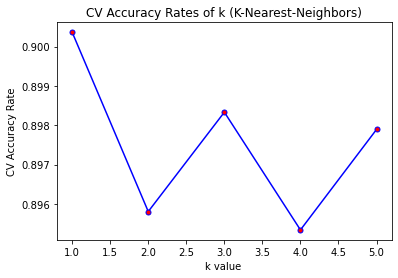

In [35]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [36]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index+1, 'accuracy = ', value)

best k =  1 accuracy =  0.9003644014595675


## KNN: Model Creation

In [37]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=6 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=6, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

## KNN: Deploying the model

In [38]:
import pickle
pickle.dump(best_knn, open('best_knn.pkl', 'wb'))
pickle.dump(mms, open('normalization.pkl', 'wb'))

In [39]:
df.to_csv('newtcas.csv')